# **TRABAJO DE SEGMENTACION DE CLIENTES PARA EASY MONEY**

Easy Money es una entidad ficticia de banca digital para la que ocupo el rol de Data Scientist. Se nos facilita un dataset con cinco conjuntos de datos de los clientes, los productos y las ventas. En este caso se nos pide que realicemos una segmentación de los clientes en función de los datos de los que disponemos.

Para su desarrollo, trataremos los datos y llevaremos a nuestro modelo de segmentación alguna de las variables que se nos facilitan, así como nuevas variables que crearemos y darán peso al modelo en base a los datos que se nos facilitan.

Se trata entonces de crear un modelo de clusterización de Machine Learning donde se aplicará el método del codo para determinar el número ideal de clústeres y se trabajará con el algoritmo K-means para la creación de cada uno de ellos.

Finalmente, se presentan los resultados en un conjunto de gráficas que permiten observar las peculiaridades de cada clúster así como la comparativa entre ellos.

Como extra de valor al trabajo, se crea una presentación en PowerPoint con los resultados de Power BI, de propensión y de segmentación para exponerlos al CEO de la empresa y al equipo de Marketing.

# **IMPORTAR LIBRERIAS**

In [ ]:
import numpy as np
import pandas as pd

import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

np.random.seed(40)

# **IMPORTAR DATOS**

**Para este trabajo de segmentación vamos a tener en cuenta los archivos que nos han facilitado donde tengamos información sobre los clientes. El dataframe de ventas lo usaremos para crear alguna nueva variable. LLamaremos a los dataframes con los mismos nombres con los que lo veniamos haciendo.**

In [ ]:
# Conectandose a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_csv("/content/drive/Othercomputers/Victor/MASTER DATA SCIENCE - copia/TFM/datasets_TFM + diccionario/customer_commercial_activity.csv")

In [ ]:
df2=pd.read_csv("/content/drive/Othercomputers/Victor/MASTER DATA SCIENCE - copia/TFM/datasets_TFM + diccionario/customer_products.csv")

In [ ]:
df3=pd.read_csv("/content/drive/Othercomputers/Victor/MASTER DATA SCIENCE - copia/TFM/datasets_TFM + diccionario/customer_sociodemographics.csv")

In [ ]:
df4=pd.read_csv("/content/drive/Othercomputers/Victor/MASTER DATA SCIENCE - copia/TFM/datasets_TFM + diccionario/sales.csv")

# **UNIONES**

In [ ]:
# Eliminamos la columna "Unnamed: 0" de los dos dataframes que falta

df1.drop(['Unnamed: 0'], axis=1, inplace = True)
df2.drop(['Unnamed: 0'], axis=1, inplace = True)
df3.drop(['Unnamed: 0'], axis=1, inplace = True)

In [ ]:
# Unimos df1 y df2 creando df_clientes

df_clientes = df1.merge(df2, on = ['pk_cid','pk_partition'])

In [ ]:
# Unimos df3 a df_clientes

df_clientes = df_clientes.merge(df3, on = ['pk_cid','pk_partition'])

In [ ]:
df_clientes

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES,0,0,0,0,...,0,0,0,1,ES,29.0,H,35,N,87218.10
1,1050611,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13.0,V,23,N,35548.74
2,1050612,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13.0,V,23,N,122179.11
3,1050613,2018-01,2015-08,KHD,0.0,03 - UNIVERSITARIO,1,0,0,0,...,0,0,0,0,ES,50.0,H,22,N,119775.54
4,1050614,2018-01,2015-08,KHE,1.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,50.0,V,23,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05,2016-08,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,50.0,V,22,N,43912.17
5962920,1166764,2019-05,2016-08,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,26.0,V,23,N,23334.99
5962921,1166763,2019-05,2016-08,KHE,1.0,02 - PARTICULARES,0,0,0,0,...,0,0,0,1,ES,50.0,H,47,N,NaN
5962922,1166789,2019-05,2016-08,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,50.0,H,22,N,199592.82


In [ ]:
# Cambiar el tipo de dato de pk_cid
df_clientes['pk_cid'] = df_clientes['pk_cid'].astype('object')

# Obtener el tipo de datos actual de cada columna
tipos_actuales = df_clientes.dtypes

# Iterar sobre todas las columnas del DataFrame
for columna in df_clientes.columns:
    tipo_actual = tipos_actuales[columna]

    # Verificar el tipo actual y cambiarlo según corresponda
    if tipo_actual == 'int64':
        df_clientes[columna] = df_clientes[columna].astype('int8')
    elif tipo_actual == 'float64':
        df_clientes[columna] = df_clientes[columna].astype('float32')

In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              object 
 1   pk_partition        object 
 2   entry_date          object 
 3   entry_channel       object 
 4   active_customer     float32
 5   segment             object 
 6   short_term_deposit  int8   
 7   loans               int8   
 8   mortgage            int8   
 9   funds               int8   
 10  securities          int8   
 11  long_term_deposit   int8   
 12  em_account_pp       int8   
 13  credit_card         int8   
 14  payroll             float32
 15  pension_plan        float32
 16  payroll_account     int8   
 17  emc_account         int8   
 18  debit_card          int8   
 19  em_account_p        int8   
 20  em_acount           int8   
 21  country_id          object 
 22  region_code         float32
 23  gender              object 
 24  age                 int8

# **PREPROCESING**

In [ ]:
# lista con los nombres de las columnas correspondientes a productos

df_products = df2.drop(['pk_cid','pk_partition'], axis=1)
lista_productos = df_products.columns.tolist()

## **Info de df_clientes**

In [ ]:
df_clientes.isnull().sum()

pk_cid                      0
pk_partition                0
entry_date                  0
entry_channel          133033
active_customer             0
segment                133944
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
country_id                  0
region_code              2264
gender                     25
age                         0
deceased                    0
salary                1541104
dtype: int64

## **Active_customer**

In [ ]:
# calculamos la media de los registros de active_customer para cada cliente
df_clientes['active_customer'] = df_clientes.groupby('pk_cid')['active_customer'].transform('mean').round(1)


In [ ]:
# Creamos funcion para reasignar valores.
# Mayor o igual a 0.7 = activo (1)
# Menos a 0.7 = no activo (0)

def asignar_valor(valor):
    if valor >= 0.7:
        return 1
    else:
        return 0

# Aplicar la función de transformación a la columna "active_customer"
df_clientes['active_customer'] = df_clientes['active_customer'].apply(asignar_valor)

## **Segment**

In [ ]:
# cambiar nombre a los valores de segment para su mayor legibilidad
df_clientes['segment'] = df_clientes['segment'].replace('01 - TOP', 'TOP').replace('02 - PARTICULARES', 'PARTICULARES').replace('03 - UNIVERSITARIO', 'UNIVERSITARIO')

## **Entry_channel**

En la variable entry_channel no vamos a tocar nada de momento.

## **Country_id**

In [ ]:
# Comprobamos el peso de cada valor dentro de la variable "country_id"

df_clientes['country_id'].value_counts()

ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE         79
IE         68
MX         58
AT         51
AR         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
LU         17
ET         17
QA         17
CI         17
SA         17
CM         17
SN         17
MR         17
NO         17
RU         17
CO         17
GA         17
GT         17
DO         17
SE         16
DJ         11
PT         11
JM         11
RO          9
HU          8
DZ          7
PE          4
Name: country_id, dtype: int64

In [ ]:
# Si lo llevamos a porcentaje redondeado, el 100% corresponde a "ES"

(df_clientes['country_id'].value_counts()/df_clientes.shape[0]).mul(100).round(1)

ES    100.0
GB      0.0
FR      0.0
DE      0.0
US      0.0
CH      0.0
BR      0.0
BE      0.0
VE      0.0
IE      0.0
MX      0.0
AT      0.0
AR      0.0
PL      0.0
IT      0.0
MA      0.0
CL      0.0
CN      0.0
CA      0.0
LU      0.0
ET      0.0
QA      0.0
CI      0.0
SA      0.0
CM      0.0
SN      0.0
MR      0.0
NO      0.0
RU      0.0
CO      0.0
GA      0.0
GT      0.0
DO      0.0
SE      0.0
DJ      0.0
PT      0.0
JM      0.0
RO      0.0
HU      0.0
DZ      0.0
PE      0.0
Name: country_id, dtype: float64

In [ ]:
# Por tanto, se decide focalizar nuestro trabajo en el ambito nacional.

# Se agrupan todos los registros distintos de ES como EX (extranjero)

df_clientes.loc[df_clientes['country_id'] != 'ES', 'country_id'] = 'EX'

In [ ]:
df_clientes['country_id'].value_counts()

ES    5960672
EX       2252
Name: country_id, dtype: int64

## **Region_code**

Conseguimos enlazar cada codigo de region_code con su correspondiente ciudad y comunidad autonoma. Mas adelante comprobaremos que no tiene un peso en el modelo de segmentación.

In [ ]:
df_clientes['region_code'].value_counts()

28.0    1185757
8.0      600362
46.0     358142
30.0     296856
41.0     290447
15.0     254891
29.0     187911
36.0     175850
3.0      171358
11.0     160894
33.0     134562
50.0     132983
6.0      122587
35.0     121982
47.0     116948
18.0     102789
45.0     102328
37.0      92538
10.0      83283
14.0      75405
2.0       72071
21.0      72037
13.0      70092
39.0      69589
12.0      68709
7.0       62436
32.0      54639
27.0      52783
43.0      51782
17.0      50749
9.0       47746
25.0      46887
16.0      36094
24.0      35426
48.0      35256
26.0      34790
4.0       32680
31.0      31241
49.0      30965
23.0      30955
38.0      29001
34.0      27545
19.0      26762
40.0      21658
5.0       21300
22.0      21112
20.0      18833
1.0       12999
44.0      12616
42.0       8500
51.0       2896
52.0       2638
Name: region_code, dtype: int64

In [ ]:
(df_clientes['region_code'].value_counts()/df_clientes.shape[0]).cumsum().mul(100).round(1)

28.0     19.9
8.0      30.0
46.0     36.0
30.0     40.9
41.0     45.8
15.0     50.1
29.0     53.2
36.0     56.2
3.0      59.1
11.0     61.8
33.0     64.0
50.0     66.2
6.0      68.3
35.0     70.3
47.0     72.3
18.0     74.0
45.0     75.7
37.0     77.3
10.0     78.7
14.0     80.0
2.0      81.2
21.0     82.4
13.0     83.6
39.0     84.7
12.0     85.9
7.0      86.9
32.0     87.8
27.0     88.7
43.0     89.6
17.0     90.4
9.0      91.2
25.0     92.0
16.0     92.6
24.0     93.2
48.0     93.8
26.0     94.4
4.0      94.9
31.0     95.5
49.0     96.0
23.0     96.5
38.0     97.0
34.0     97.5
19.0     97.9
40.0     98.3
5.0      98.6
22.0     99.0
20.0     99.3
1.0      99.5
44.0     99.7
42.0     99.9
51.0     99.9
52.0    100.0
Name: region_code, dtype: float64

In [ ]:
(df_clientes['region_code'].value_counts()/df_clientes.shape[0]).mul(100).round(1)

28.0    19.9
8.0     10.1
46.0     6.0
30.0     5.0
41.0     4.9
15.0     4.3
29.0     3.2
36.0     2.9
3.0      2.9
11.0     2.7
33.0     2.3
50.0     2.2
6.0      2.1
35.0     2.0
47.0     2.0
18.0     1.7
45.0     1.7
37.0     1.6
10.0     1.4
14.0     1.3
2.0      1.2
21.0     1.2
13.0     1.2
39.0     1.2
12.0     1.2
7.0      1.0
32.0     0.9
27.0     0.9
43.0     0.9
17.0     0.9
9.0      0.8
25.0     0.8
16.0     0.6
24.0     0.6
48.0     0.6
26.0     0.6
4.0      0.5
31.0     0.5
49.0     0.5
23.0     0.5
38.0     0.5
34.0     0.5
19.0     0.4
40.0     0.4
5.0      0.4
22.0     0.4
20.0     0.3
1.0      0.2
44.0     0.2
42.0     0.1
51.0     0.0
52.0     0.0
Name: region_code, dtype: float64

In [ ]:
regiones = df_clientes.groupby('pk_cid')['region_code'].last().to_frame().value_counts()
lista_regiones = regiones.reset_index()['region_code'].to_list()

In [ ]:
spanish_regions_code = {1:['Elciego', 'País Vasco'], 2:['Albacete', 'Castilla-La Mancha'], 3:['Alicante/Alacant', 'Com. Valenciana'],4:['Almería','Andalucía'],5:['Ávila','Castilla y León'], 6:['Badajoz','Extremadura'],	7:['Palma','Islas Baleares'], 8:['Barcelona','Cataluña'],9:['Burgos','Castilla y León'], 10: ['Cáceres','Extremadura'], 11: ['Cádiz','Andalucía'], 12: ['Castellón de la Plana/Castelló de la Plana','Com. Valenciana'], 13: ['Ciudad Real','Castilla-La Mancha'], 14: ['Córdoba','Andalucía'], 15: ['Coruña (A)','Galicia'], 16: ['Cuenca','Castilla-La Mancha'], 17: ['Girona','Cataluña'], 18: ['Granada','Andalucía'], 19: ['Guadalajara','Castilla-La Mancha'], 20: ['Donostia-San Sebastián','País Vasco'], 21: ['Huelva','Andalucía'], 22: ['Huesca','Aragón'], 23: ['Jaén','Andalucía'], 24: ['León','Castilla y León'], 25: ['Lleida','Cataluña'], 26: ['Logroño','La Rioja'], 27: ['Lugo','Galicia'], 28: ['Madrid','Madrid'], 29: ['Málaga','Andalucía'], 30: ['Murcia','Murcia'], 31: ['Pamplona/Iruña','Com. de Navarra'], 32: ['Ourense','Galicia'], 33: ['Oviedo','Princ. de Asturias'], 34: ['Palencia','Castilla y León'], 35: ['Palmas de Gran Canaria (Las)','Islas Canarias'], 36: ['Pontevedra','Galicia'], 37: ['Salamanca','Castilla y León'], 38: ['Santa Cruz de Tenerife','Islas Canarias'], 39: ['Santander','Cantabria'], 40: ['Segovia','Castilla y León'], 41: ['Sevilla','Andalucía'], 42: ['Soria','Castilla y León'], 43: ['Tarragona','Cataluña'], 44: ['Teruel','Aragón'], 45: ['Toledo','Castilla-La Mancha'], 46: ['Valencia','Com. Valenciana'], 47: ['Valladolid','Castilla y León'], 48: ['Bilbao','País Vasco'], 49: ['Zamora','Castilla y León'], 50: ['Zaragoza','Aragón'], 51: ['Ceuta','Ceuta y Melilla'], 52: ['Melilla','Ceuta y Melilla']}

In [ ]:
spain = pd.DataFrame(spanish_regions_code).T
spain.columns = ['Ciudad','Com.Autonoma']
spain.reset_index(inplace=True)

In [ ]:
regiones = pd.DataFrame(lista_regiones, columns=['region_code'])
regiones = pd.merge(regiones, spain, how='left', left_on='region_code', right_on='index')

In [ ]:
regiones.drop(['index'], axis=1, inplace=True)

In [ ]:
regiones

,region_code,Ciudad,Com.Autonoma
0,28.0,Madrid,Madrid
1,8.0,Barcelona,Cataluña
2,46.0,Valencia,Com. Valenciana
3,30.0,Murcia,Murcia
4,41.0,Sevilla,Andalucía
5,15.0,Coruña (A),Galicia
6,29.0,Málaga,Andalucía
7,3.0,Alicante/Alacant,Com. Valenciana
8,36.0,Pontevedra,Galicia
9,11.0,Cádiz,Andalucía


In [ ]:
df_clientes = df_clientes.merge(regiones, how='left', on=['region_code'])

## **Deceased**

In [ ]:
# como ya hicimos para la propension, eliminamos a los clientes fallecidos

df_clientes.drop(df_clientes[df_clientes['deceased'] == 'S'].index, inplace=True)

In [ ]:
# borramos la columna "deceased" que ya no aporta nada.

df_clientes.drop(['deceased'], axis=1, inplace = True)

## **Entry_date**

Esta variable va a ser utilizada para crear una variable nueva llamada antiguedad. Una vez creada la nueva variable, entry_date sera eliminada.

## **Salary**

A pesar de que seria una muy buena variable, despues de comprobar que:
- el margen entre salarios minimos y maximos son desproporcionados
- existe un 33% de valores nulos
- esos nulos corresponden casi en su totalidad a clientes con poca antiguedad
- la media de salario para el segmento UNIVERSITARIO es de 80.000€ aprox.
- esa media es la misma que para el segmento PARTICULARES.

Sospechamos demasiado sobre la fiabilidad de estos datos y, aunque seria una muy buena variable para el modelo de segmentacion, no la vamos a tener en cuenta. Mas adelante imputaremos los valores nulos.

## **Gender**

Vamos a prescindir de esta variable ya que, despues de haberla incluido en nuestras pruebas como una variable más, los resultados no han hecho mas que confirmar nuestro pensamiento y nuestras ideas acerca de tener en cuenta el género en este tipo de segmentacion: era la variable que menos valor aportaba de todas y se observaba una total paridad en los resultados. Por ello, la decidimos eliminar en nuestro desarrollo final.

In [ ]:
df_clientes.drop('gender', axis=1, inplace=True)

In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961849 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              object 
 1   pk_partition        object 
 2   entry_date          object 
 3   entry_channel       object 
 4   active_customer     int64  
 5   segment             object 
 6   short_term_deposit  int8   
 7   loans               int8   
 8   mortgage            int8   
 9   funds               int8   
 10  securities          int8   
 11  long_term_deposit   int8   
 12  em_account_pp       int8   
 13  credit_card         int8   
 14  payroll             float32
 15  pension_plan        float32
 16  payroll_account     int8   
 17  emc_account         int8   
 18  debit_card          int8   
 19  em_account_p        int8   
 20  em_acount           int8   
 21  country_id          object 
 22  region_code         float32
 23  age                 int8   
 24  salary              floa

# **NUEVAS VARIABLES**

## **Indices de tenencia de producto**

**En este caso, vamos a calcular la tenencia de cada producto para cada cliente. Se genera un indice de tenencia por producto en una nueva variable para cada producto que toma mas peso para la segmentacion. Los valores de la grafica se han calculado para el historico de los clientes de nuestra ultima fecha de particion.**

In [ ]:
# Iterar sobre cada producto de la lista
for producto in lista_productos:
    # Calcular el índice de tenencia para el producto actual
    df_clientes[f'indice_tenencia_{producto}'] = df_clientes.groupby('pk_cid')[producto].transform('sum') / df_clientes.groupby('pk_cid')['pk_partition'].transform('nunique')

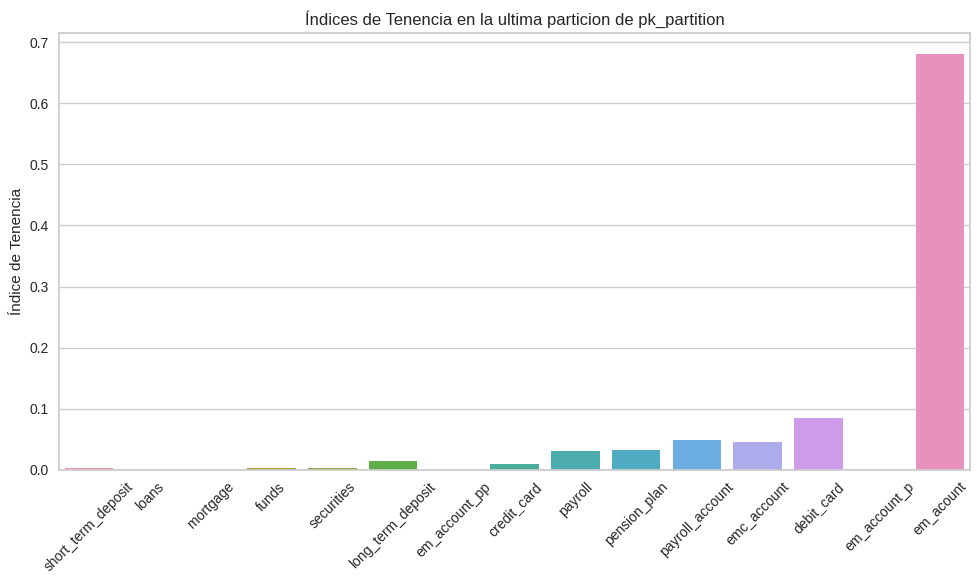

In [ ]:
import seaborn as sns

# Filtrar el DataFrame por la última partición de pk_partition
df_ultima_particion = df_clientes[df_clientes['pk_partition'] == df_clientes['pk_partition'].max()]

# Calcular el índice de tenencia promedio por producto en la última partición
indices_tenencia_ultima_particion = df_ultima_particion[[f'indice_tenencia_{producto}' for producto in lista_productos]].mean()

# Configurar el tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Generar el gráfico de barras
sns.barplot(x=indices_tenencia_ultima_particion.index, y=indices_tenencia_ultima_particion.values)

# Configurar el eje x y las etiquetas de los productos
plt.xticks(rotation=45)
plt.xticks(range(len(lista_productos)), lista_productos)

# Configurar el eje y y la etiqueta
plt.ylabel('Índice de Tenencia')

# Configurar el título de la gráfica
plt.title('Índices de Tenencia en la ultima particion de pk_partition')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## **Antiguedad**

In [ ]:
df_clientes['entry_date'] = pd.to_datetime(df_clientes['entry_date'])
df_clientes['pk_partition'] = pd.to_datetime(df_clientes['pk_partition'])

In [ ]:
ultima_fecha = df_clientes['pk_partition'].max()

In [ ]:
df_clientes['antiguedad'] = ((ultima_fecha - df_clientes['entry_date']).dt.days / 30).round(1)

In [ ]:
df_clientes['antiguedad'].value_counts()

31.4    382458
19.2    340561
43.6    310243
20.2    294752
22.3    267144
33.4    252697
45.6    221946
46.7    220851
18.2    217740
44.6    217152
7.1     216939
42.6    210644
32.4    206070
8.1     202261
34.5    189197
30.4    188579
10.1    178202
21.3    162522
9.1     138414
17.2    123426
6.0     103073
29.4     89386
41.6     82305
28.3     65507
15.1     61266
16.2     59710
23.3     54881
14.2     51013
40.5     50803
27.3     50533
26.4     50264
24.3     50131
25.3     47705
13.2     43480
5.0      41244
12.2     40541
48.7     39977
37.5     35666
11.1     35585
50.7     35304
49.7     34699
36.5     33223
47.7     33057
4.0      32640
51.7     30604
35.5     30068
52.7     29646
39.5     29501
38.5     27287
3.0      23533
2.0      14434
1.0       8602
0.0       4383
Name: antiguedad, dtype: int64

## **Media de productos contratados simultaneamente**

In [ ]:
# Creamos la columna total_products
df_clientes['total_products'] = df_clientes[lista_productos].sum(axis=1)

# Calcular la suma de total_products para cada cliente
df_clientes['suma_total_products'] = df_clientes.groupby('pk_cid')['total_products'].transform('sum')

# Contar el número de valores de pk_partition para cada cliente
df_clientes['num_valores_pk_partition'] = df_clientes.groupby('pk_cid')['pk_partition'].transform('count')

# Calcular el índice de tenencia dividiendo la suma de total_products por el número de valores de pk_partition
df_clientes['media_prod_simult'] = df_clientes['suma_total_products'] / df_clientes['num_valores_pk_partition']

# Eliminar las columnas intermedias si no son necesarias
df_clientes = df_clientes.drop(['suma_total_products', 'num_valores_pk_partition'], axis=1)

## **Frecuencia de compra por clintes**

In [ ]:
# cambiar en df4 "cid" por "pk_cid"
df4.rename(columns={'cid': 'pk_cid'}, inplace=True)

In [ ]:
df4['pk_cid'] = df4['pk_cid'].astype('object')

In [ ]:
frecuencia_compra = df4['pk_cid'].value_counts()
df_frecuencia = pd.DataFrame({'pk_cid': frecuencia_compra.index, 'frecuencia_compra': frecuencia_compra.values})

In [ ]:
df_clientes = pd.merge(df_clientes, df_frecuencia, on='pk_cid', how='left')

In [ ]:
df_clientes

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,indice_tenencia_pension_plan,indice_tenencia_payroll_account,indice_tenencia_emc_account,indice_tenencia_debit_card,indice_tenencia_em_account_p,indice_tenencia_em_acount,antiguedad,total_products,media_prod_simult,frecuencia_compra
0,1375586,2018-01-01,2018-01-01,KHL,0,PARTICULARES,0,0,0,0,...,0.0,0.0,0.0,0.235294,0.0,1.0,16.2,1.0,1.235294,1.0
1,1050611,2018-01-01,2015-08-01,KHE,0,UNIVERSITARIO,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,1.0,45.6,1.0,1.000000,NaN
2,1050612,2018-01-01,2015-08-01,KHE,0,UNIVERSITARIO,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,1.0,45.6,1.0,1.000000,NaN
3,1050613,2018-01-01,2015-08-01,KHD,0,UNIVERSITARIO,1,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,45.6,1.0,0.142857,NaN
4,1050614,2018-01-01,2015-08-01,KHE,1,UNIVERSITARIO,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,1.0,45.6,1.0,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961844,1166765,2019-05-01,2016-08-01,KHE,0,UNIVERSITARIO,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,1.0,33.4,1.0,1.000000,NaN
5961845,1166764,2019-05-01,2016-08-01,KHE,0,UNIVERSITARIO,0,0,0,0,...,0.0,0.0,0.0,0.058824,0.0,1.0,33.4,1.0,1.058824,1.0
5961846,1166763,2019-05-01,2016-08-01,KHE,1,PARTICULARES,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,1.0,33.4,1.0,1.000000,NaN
5961847,1166789,2019-05-01,2016-08-01,KHE,0,UNIVERSITARIO,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,1.0,33.4,1.0,1.000000,NaN


## **Valor total de ventas por cliente**

In [ ]:
# Calcular el valor total de ventas por cliente
valor_ventas = df4.groupby('pk_cid')['net_margin'].sum()
df_clientes['valor_ventas'] = df_clientes['pk_cid'].map(valor_ventas)

# **DF_FINAL**

## **Seleccion de cartera de clientes a evaluar**

**En los tres dataframes aparece la columna pk_partition que actualiza los datos mensualmente.**

**Si comprobamos valores unicos de clientes por mes, podemos observar en la grafica que el numero de clientes ha ido creciendo mes a mes y, por tanto, la partición con más clientes es además la última, por lo que filtraremos los dataframes por la fecha de su última partición.**

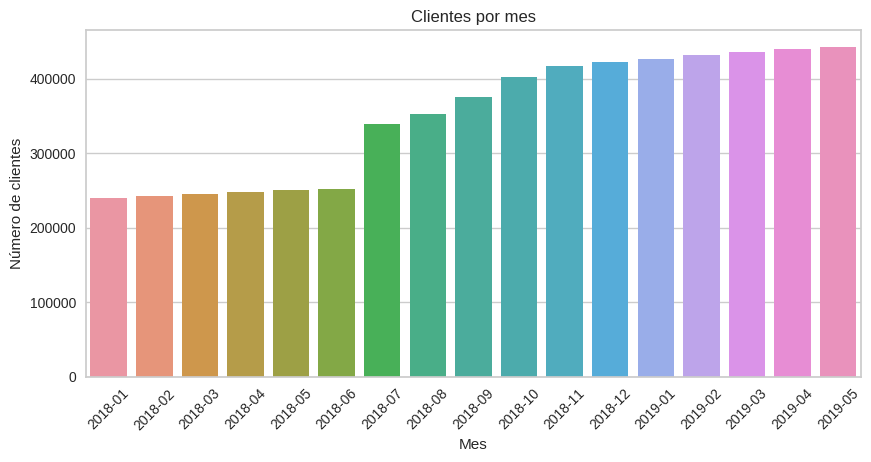

In [ ]:
clientes_por_mes = df3.groupby('pk_partition')['pk_cid'].nunique()

# Crea la gráfica de barras

plt.figure(figsize=(10, 4.5))
sns.barplot(x=clientes_por_mes.index, y=clientes_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Número de clientes')
plt.title('Clientes por mes')
plt.xticks(rotation=45, ha='center')
plt.show()

## **Preparar df_clientes**

In [ ]:
df_clientes.isnull().sum()

pk_cid                                      0
pk_partition                                0
entry_date                                  0
entry_channel                          133033
active_customer                             0
segment                                133944
short_term_deposit                          0
loans                                       0
mortgage                                    0
funds                                       0
securities                                  0
long_term_deposit                           0
em_account_pp                               0
credit_card                                 0
payroll                                    61
pension_plan                               61
payroll_account                             0
emc_account                                 0
debit_card                                  0
em_account_p                                0
em_acount                                   0
country_id                        

In [ ]:
df_clientes = df_clientes[df_clientes['pk_partition'] == '2019-05']

In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442909 entries, 5518940 to 5961848
Data columns (total 47 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   pk_cid                              442909 non-null  object        
 1   pk_partition                        442909 non-null  datetime64[ns]
 2   entry_date                          442909 non-null  datetime64[ns]
 3   entry_channel                       438400 non-null  object        
 4   active_customer                     442909 non-null  int64         
 5   segment                             438293 non-null  object        
 6   short_term_deposit                  442909 non-null  int8          
 7   loans                               442909 non-null  int8          
 8   mortgage                            442909 non-null  int8          
 9   funds                               442909 non-null  int8          
 10  s

In [ ]:
# eliminamos registros nulos de la variable segment
df_clientes = df_clientes.dropna(subset=['segment'])

In [ ]:
df_clientes['country_id'].value_counts()

ES    438132
EX       161
Name: country_id, dtype: int64

In [ ]:
# Focalizamos nuestro trabajo en el ambito nacional

df_clientes = df_clientes[df_clientes['country_id'] != 'EX']

## **Salary**

In [ ]:
# numero total de nulos en "salary"

df_clientes['salary'].isnull().sum()

144793

In [ ]:
# porcentaje de nulos en "salary"

((df_clientes['salary'].isnull().sum() / df_clientes.shape[0]) * 100).round(1)

33.0

**Salary es una columna que presenta un alto numero de nulos (33%). Intentaremos buscar algún tipo de relación de los nulos de salary con los valores de la variable "segment" para ver si los nulos corresponden a clientes universitarios.**

In [ ]:
# buscamos relacion con alguno de los tipos de clientes

def plot_nulls_by_segment(df):
    # Filtrar el DataFrame para las filas con valores nulos en "salary"
    nulls_df = df[df['salary'].isnull()]

    # Contar el número de valores nulos para cada valor de "segment"
    nulls_by_segment = nulls_df['segment'].value_counts()

    # Ordenar los valores por el índice de "nulls_by_segment"
    nulls_by_segment = nulls_by_segment.sort_index()

    # Configurar el estilo del gráfico
    sns.set(style="whitegrid")

    # Configurar el tamaño de la figura
    plt.figure(figsize=(5, 4))

    # Generar el gráfico de barras
    sns.barplot(x=nulls_by_segment.index, y=nulls_by_segment.values)
    plt.xlabel('')
    plt.ylabel('Nulos')
    plt.title('Numero de nulos de Salary segun Segment')

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.xticks(rotation=45)

    plt.show()

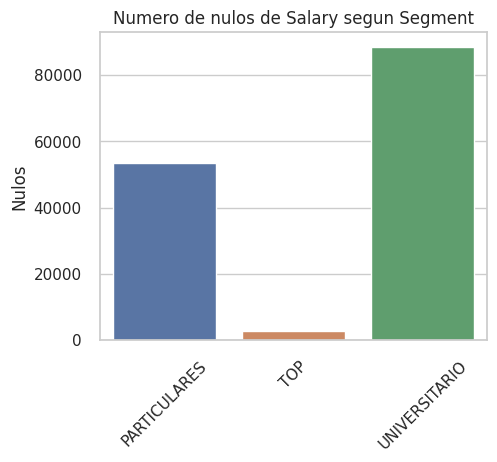

In [ ]:
plot_nulls_by_segment(df_clientes)

In [ ]:
df_clientes[df_clientes['salary'].isnull()]['segment'].value_counts()

UNIVERSITARIO    88556
PARTICULARES     53502
TOP               2735
Name: segment, dtype: int64

In [ ]:
# Agrupar el DataFrame por la columna "segment" y calcular la mediana de "salary" en cada grupo
median_salary = df_clientes.groupby("segment")["salary"].transform("median")

# Imputar los valores nulos en "salary" con la mediana correspondiente a cada grupo
df_clientes["salary"] = df_clientes["salary"].fillna(median_salary)

In [ ]:
df_clientes.isnull().sum()

pk_cid                                     0
pk_partition                               0
entry_date                                 0
entry_channel                             30
active_customer                            0
segment                                    0
short_term_deposit                         0
loans                                      0
mortgage                                   0
funds                                      0
securities                                 0
long_term_deposit                          0
em_account_pp                              0
credit_card                                0
payroll                                    0
pension_plan                               0
payroll_account                            0
emc_account                                0
debit_card                                 0
em_account_p                               0
em_acount                                  0
country_id                                 0
region_cod

## **Comprobacion de valores unicos**

In [ ]:
df_clientes.nunique()

pk_cid                                438132
pk_partition                               1
entry_date                                52
entry_channel                             65
active_customer                            2
segment                                    3
short_term_deposit                         2
loans                                      2
mortgage                                   2
funds                                      2
securities                                 2
long_term_deposit                          2
em_account_pp                              1
credit_card                                2
payroll                                    2
pension_plan                               2
payroll_account                            2
emc_account                                2
debit_card                                 2
em_account_p                               2
em_acount                                  2
country_id                                 1
region_cod

In [ ]:
# comprobamos que ocurre en em_account_p que solo tiene dos valores unicos

df_clientes['em_account_p'].value_counts()

0    438130
1         2
Name: em_account_p, dtype: int64

In [ ]:
# solo dos personas lo han tenido contratado. La eliminamos.

df_clientes.drop(['em_account_p'], axis=1, inplace = True)

In [ ]:
# eliminamos variables de producto con un solo valor unico

df_clientes.drop(['em_account_pp'], axis=1, inplace = True)


In [ ]:
# eliminamos variables de producto con un solo valor unico

df_clientes.drop(['country_id'], axis=1, inplace = True)

In [ ]:
# eliminamos variables que redundan y no nos aportan nada

df_clientes.drop(['region_code'], axis=1, inplace = True)

In [ ]:
# eliminamos variables que redundan y no nos aportan nada

df_clientes.drop(['total_products'], axis=1, inplace = True)

## **Duplicados**

In [ ]:
df_clientes.drop('pk_partition', axis=1, inplace=True)

In [ ]:
df_clientes.duplicated().sum()

0

In [ ]:
df_clientes.nunique()

pk_cid                                438132
entry_date                                52
entry_channel                             65
active_customer                            2
segment                                    3
short_term_deposit                         2
loans                                      2
mortgage                                   2
funds                                      2
securities                                 2
long_term_deposit                          2
credit_card                                2
payroll                                    2
pension_plan                               2
payroll_account                            2
emc_account                                2
debit_card                                 2
em_acount                                  2
age                                      104
salary                                254410
Ciudad                                    52
Com.Autonoma                              18
indice_ten

## **Comprobacion de posibles outliers**

In [ ]:
def plot_outliers(df, columns):
    # Filtrar el DataFrame solo con las columnas seleccionadas
    selected_columns = df[columns]

    # Configurar el tamaño de la figura
    plt.figure(figsize=(12, 6))

    # Generar el gráfico de caja y bigotes para las columnas seleccionadas
    sns.boxplot(data=selected_columns)

    # Configurar el título del gráfico
    plt.title('Boxplot of Selected Columns')

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

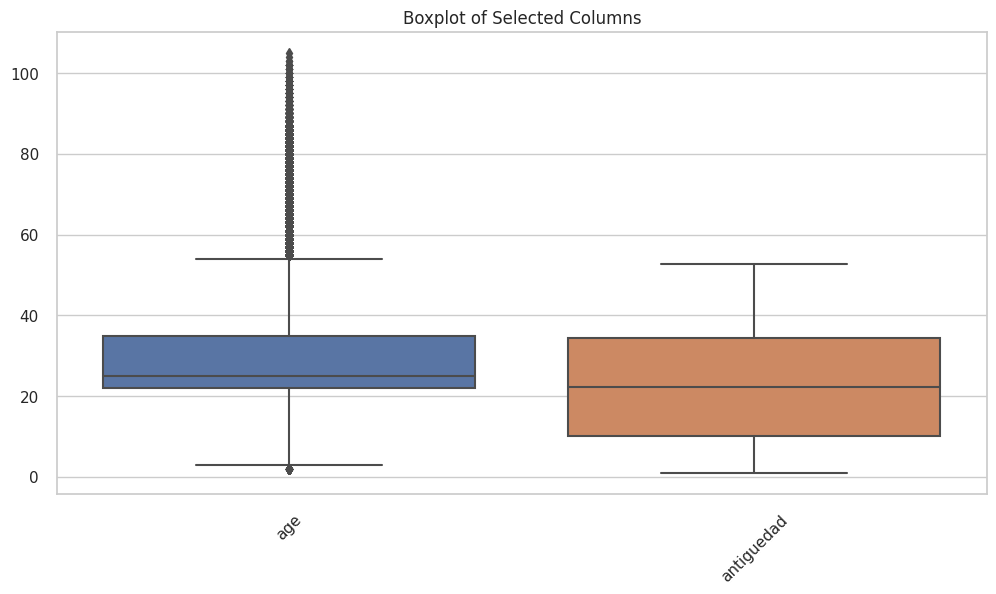

In [ ]:
plot_outliers(df_clientes, ['age','antiguedad'])

**Podemos observar que en ninguna de las variables numéricas (no binarias) tenemos outliers. En edad vemos que conforme avanza la edad, hay menos valores pero no pueden considerarse outliers como tal.**

## **Definimos df_final con las columnas seleccionadas**

In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438132 entries, 5518940 to 5961847
Data columns (total 41 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   pk_cid                              438132 non-null  object        
 1   entry_date                          438132 non-null  datetime64[ns]
 2   entry_channel                       438102 non-null  object        
 3   active_customer                     438132 non-null  int64         
 4   segment                             438132 non-null  object        
 5   short_term_deposit                  438132 non-null  int8          
 6   loans                               438132 non-null  int8          
 7   mortgage                            438132 non-null  int8          
 8   funds                               438132 non-null  int8          
 9   securities                          438132 non-null  int8          
 10  l

In [ ]:
df_clientes.isnull().sum()

pk_cid                                     0
entry_date                                 0
entry_channel                             30
active_customer                            0
segment                                    0
short_term_deposit                         0
loans                                      0
mortgage                                   0
funds                                      0
securities                                 0
long_term_deposit                          0
credit_card                                0
payroll                                    0
pension_plan                               0
payroll_account                            0
emc_account                                0
debit_card                                 0
em_acount                                  0
age                                        0
salary                                     0
Ciudad                                     0
Com.Autonoma                               0
indice_ten

In [ ]:
# Corregimos los nulos de "frecuencia_compra" con ceros, ya que son clientes que no han comprado
df_clientes['frecuencia_compra'] = df_clientes['frecuencia_compra'].fillna(0)

# Corregimos los nulos de "valor_ventas" con ceros, ya que son clientes que no han comprado
df_clientes['valor_ventas'] = df_clientes['valor_ventas'].fillna(0)

In [ ]:
# Obtener el tipo de datos actual de cada columna
tipos_actuales = df_clientes.dtypes

# Iterar sobre todas las columnas del DataFrame
for columna in df_clientes.columns:
    tipo_actual = tipos_actuales[columna]

    # Verificar el tipo actual y cambiarlo según corresponda
    if tipo_actual == 'int64':
        df_clientes[columna] = df_clientes[columna].astype('int8')
    elif tipo_actual == 'float64':
        df_clientes[columna] = df_clientes[columna].astype('float32')

In [ ]:
# Tras varias pruebas, elegimos las variables que consideramos que tienen mas valor para el modelo

df_final = df_clientes[['pk_cid',
                        'age',
                        'active_customer',
                        'antiguedad',
                        'media_prod_simult',
                        'frecuencia_compra',
                        'valor_ventas']]

In [ ]:
# guardamos en una lista todos los pk_cid
pk_cid = df_final['pk_cid']

In [ ]:
# eliminamos pk_cid
df_final.drop('pk_cid', axis=1, inplace=True)

<ipython-input-86-64e409a9546d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop('pk_cid', axis=1, inplace=True)


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438132 entries, 5518940 to 5961847
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                438132 non-null  int8   
 1   active_customer    438132 non-null  int8   
 2   antiguedad         438132 non-null  float32
 3   media_prod_simult  438132 non-null  float32
 4   frecuencia_compra  438132 non-null  float32
 5   valor_ventas       438132 non-null  float32
dtypes: float32(4), int8(2)
memory usage: 10.9 MB


# **CORRELACIONES**

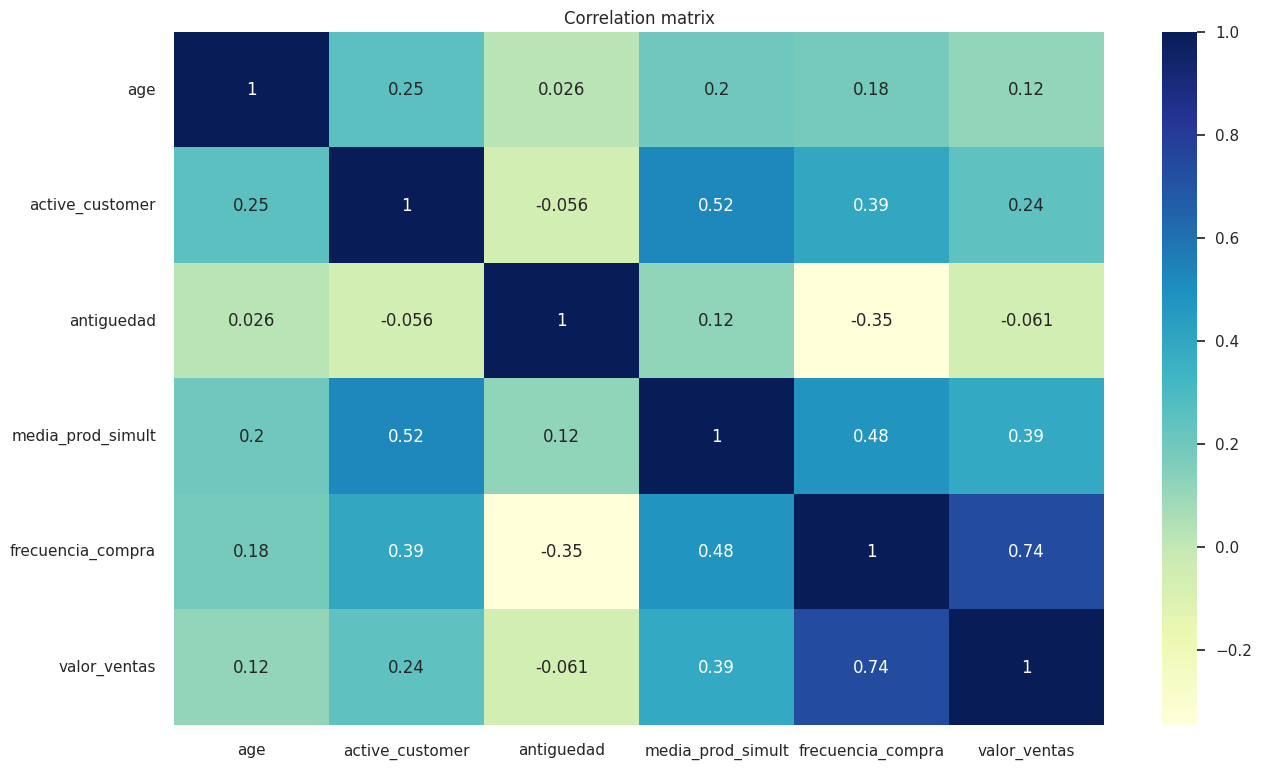

In [ ]:
plt.rcParams['figure.figsize'] = 15, 9
sns.heatmap(df_final.corr(), annot=True, cmap="YlGnBu").set_title('Correlation matrix')
plt.show()

# **ONE HOT ENCODING**

One Hot Encoding es un paso que aparece en el codigo por si quisieramos incluir una variable categórica. En este caso, no haria falta ya que todas las variables que finalmente llevamos son numéricas, aunque lo mantenemos para que no interfiera en el código que le sigue.

In [ ]:
df_final_one_hot = pd.get_dummies(df_final)

In [ ]:
df_final_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438132 entries, 5518940 to 5961847
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                438132 non-null  int8   
 1   active_customer    438132 non-null  int8   
 2   antiguedad         438132 non-null  float32
 3   media_prod_simult  438132 non-null  float32
 4   frecuencia_compra  438132 non-null  float32
 5   valor_ventas       438132 non-null  float32
dtypes: float32(4), int8(2)
memory usage: 10.9 MB


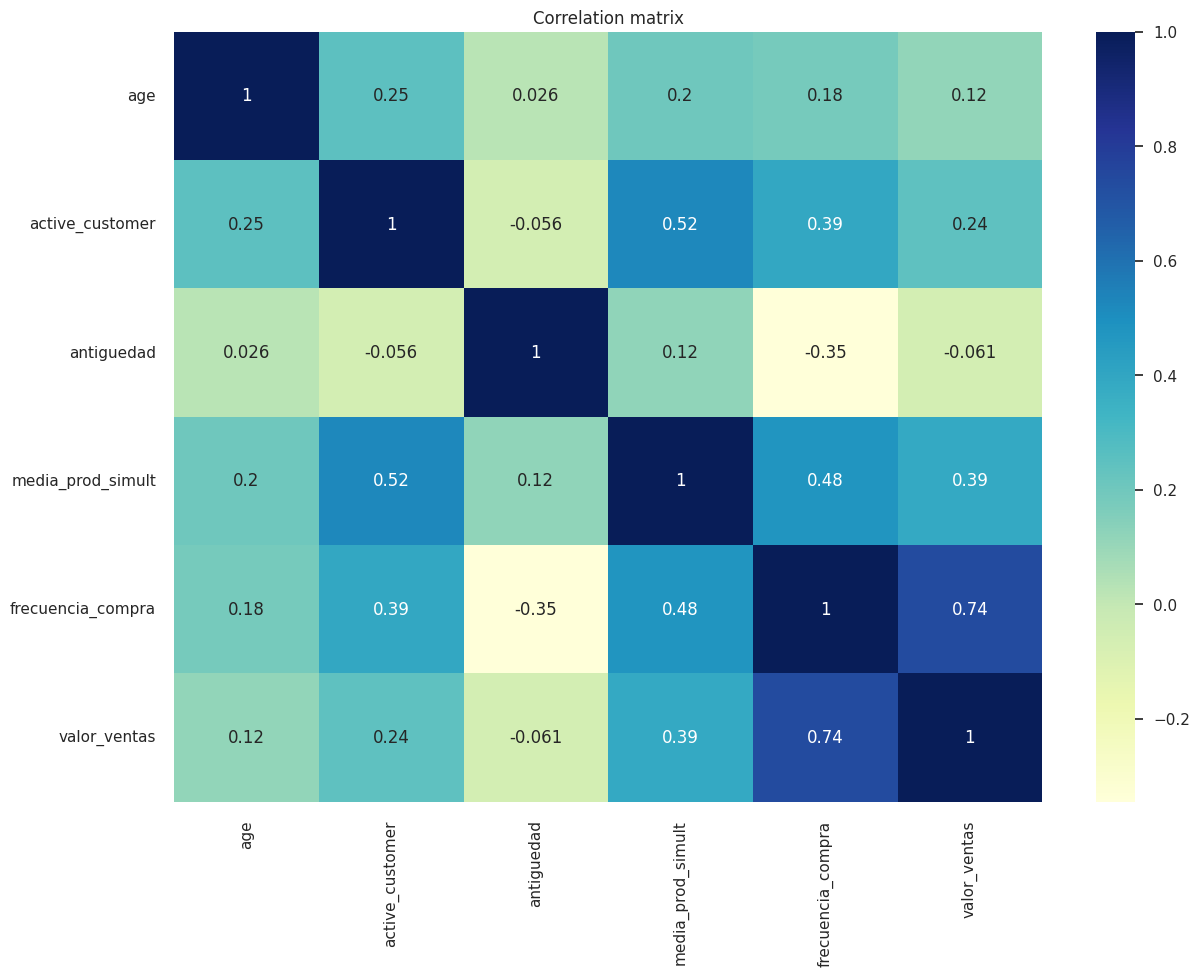

In [ ]:
plt.rcParams['figure.figsize'] = 14, 10
sns.heatmap(df_final_one_hot.corr(), annot=True, cmap="YlGnBu").set_title('Correlation matrix')
plt.show()

# **VARIANZA**

In [ ]:
# funcion para comprobar varianza de cada variable ordenada de menor a mayor

def calculate_variances(df):
    # Calcular la varianza de cada columna
    variances = df.var()

    # Ordenar las varianzas de menor a mayor
    sorted_variances = variances.sort_values()

    # Imprimir las varianzas ordenadas
    for column, variance in sorted_variances.iteritems():
        print(f"{column} : {variance}")

In [ ]:
calculate_variances(df_final_one_hot)

active_customer : 0.23160431547810195
media_prod_simult : 0.6296749114990234
frecuencia_compra : 0.9565012454986572
age : 148.05751031795083
antiguedad : 204.81874084472656
valor_ventas : 1878869.25


<ipython-input-92-08c0c0da3f1d>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, variance in sorted_variances.iteritems():


In [ ]:
df_final_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438132 entries, 5518940 to 5961847
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                438132 non-null  int8   
 1   active_customer    438132 non-null  int8   
 2   antiguedad         438132 non-null  float32
 3   media_prod_simult  438132 non-null  float32
 4   frecuencia_compra  438132 non-null  float32
 5   valor_ventas       438132 non-null  float32
dtypes: float32(4), int8(2)
memory usage: 10.9 MB


# **ESTANDARIZACION**

In [ ]:
scaler = StandardScaler()
scaler.fit(df_final_one_hot)
df_final_scaled = pd.DataFrame(scaler.transform(df_final_one_hot), columns = df_final_one_hot.columns)

In [ ]:
df_final_scaled

,age,active_customer,antiguedad,media_prod_simult,frecuencia_compra,valor_ventas
0,1.126673,1.320789,1.696913,0.045502,-0.547344,-0.239459
1,0.715755,1.320789,1.054072,3.826127,0.475143,-0.192404
2,4.496202,1.320789,0.201609,1.305711,-0.547344,-0.239459
3,0.633571,-0.757123,-1.566203,-0.374567,0.475143,-0.189631
4,2.605978,-0.757123,-0.077887,-1.214706,-0.547344,-0.239459
...,...,...,...,...,...,...
438127,-0.434816,-0.757123,0.627841,0.045502,-0.547344,-0.239459
438128,-0.681367,-0.757123,0.627841,0.045502,-0.547344,-0.239459
438129,-0.599183,-0.757123,0.627841,0.119632,0.475143,-0.198094
438130,1.373224,1.320789,0.627841,0.045502,-0.547344,-0.239459


# **PCA**

In [ ]:
# Crear una instancia de PCA
pca = PCA()

# Ajustar PCA a los datos escalados
pca.fit(df_final_scaled)

# Obtener la importancia relativa de las variables
importancia_variables = pca.components_

# Crear un DataFrame con la importancia relativa de las variables
df_importancia = pd.DataFrame(importancia_variables, columns=df_final_scaled.columns)

# Ordenar las variables por su importancia relativa en el primer componente principal
df_importancia_primer_componente = df_importancia.iloc[0].abs().sort_values(ascending=False)

# Imprimir las variables y su importancia relativa
print(df_importancia_primer_componente)

frecuencia_compra    0.548724
valor_ventas         0.480100
media_prod_simult    0.466501
active_customer      0.425685
age                  0.235047
antiguedad           0.119701
Name: 0, dtype: float32


In [ ]:
# Umbral de importancia relativa
umbral_importancia = 0.20

# Filtrar las variables que superan el umbral de importancia
variables_seleccionadas = df_importancia_primer_componente[df_importancia_primer_componente >= umbral_importancia].index.tolist()

# Seleccionar solo las variables importantes en tu DataFrame df_final_scaled
df_final_scaled = df_final_scaled[variables_seleccionadas]

In [ ]:
df_final_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438132 entries, 0 to 438131
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   frecuencia_compra  438132 non-null  float32
 1   valor_ventas       438132 non-null  float32
 2   media_prod_simult  438132 non-null  float32
 3   active_customer    438132 non-null  float32
 4   age                438132 non-null  float32
dtypes: float32(5)
memory usage: 8.4 MB


# **CLUSTERING**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

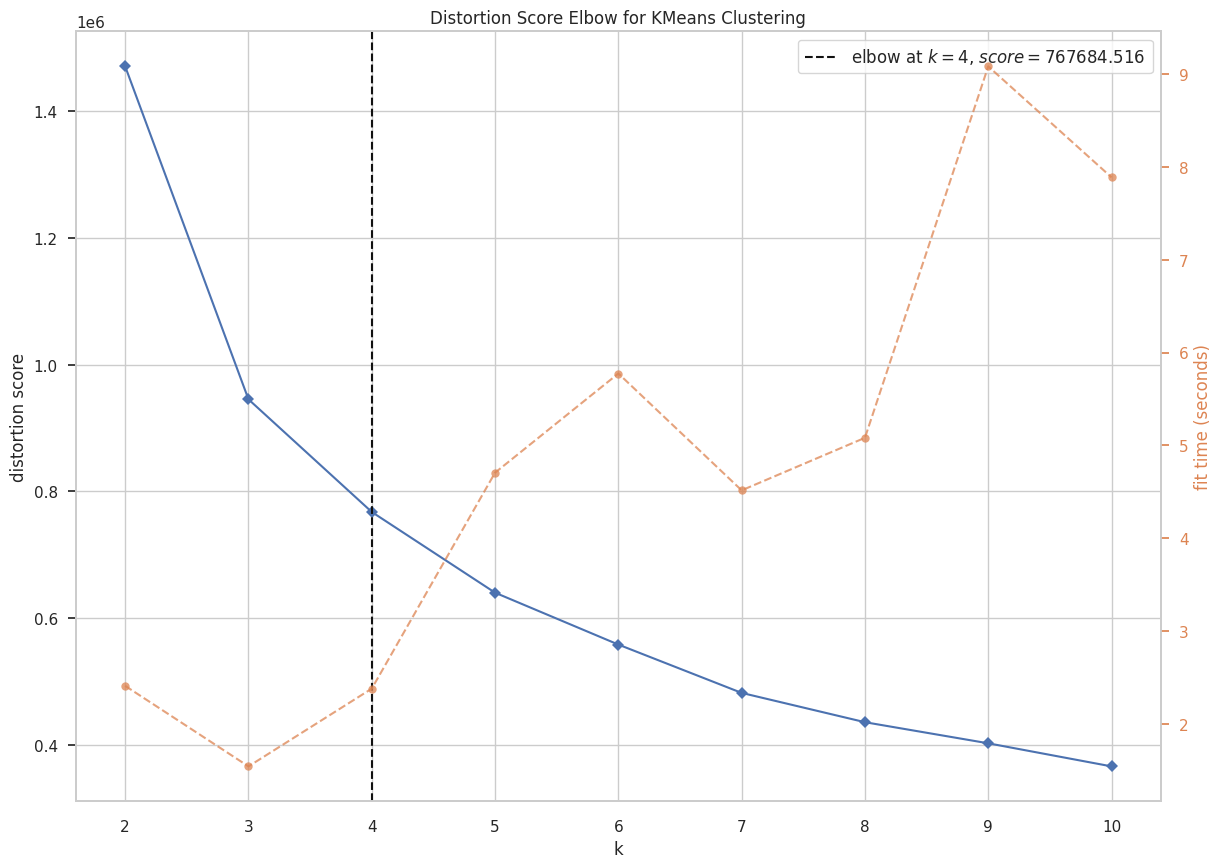

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# metodo del codo

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_final_scaled)
Elbow_M.show()

# **Kmeans**

In [ ]:
# Initiating the Agglomerative Clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
pred_kmeans = kmeans.fit_predict(df_final_scaled)

# crea una copia del df original
df_kmeans = df_clientes.copy()

# añade la etiqueta de clusters al dataset original para poder analizarlo
df_kmeans["cluster"]= pred_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_kmeans.head()

,pk_cid,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,...,indice_tenencia_payroll_account,indice_tenencia_emc_account,indice_tenencia_debit_card,indice_tenencia_em_account_p,indice_tenencia_em_acount,antiguedad,media_prod_simult,frecuencia_compra,valor_ventas,cluster
5518940,657826,2015-05-01,013,1,PARTICULARES,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.000000,48.700001,1.000000,0.0,0.000000,0
5518942,657986,2016-02-01,KAF,1,PARTICULARES,0,0,0,0,0,...,1.0,1.0,1.0,0.0,0.000000,39.500000,4.000000,1.0,64.500000,0
5518943,657905,2017-02-01,KAT,1,TOP,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.000000,27.299999,2.000000,0.0,0.000000,3
5518944,657336,2019-03-01,KAT,0,PARTICULARES,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.666667,2.000000,0.666667,1.0,68.300003,2
5518945,657147,2017-06-01,KAT,0,PARTICULARES,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,23.299999,0.000000,0.0,0.000000,3


# **DISTRIBUCION DE CLIENTES EN CLUSTERS**

In [ ]:
def add_value_labels(ax, spacing=5):
    """añade los valores del countplot
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va="bottom"

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va="top"

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha="center",                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

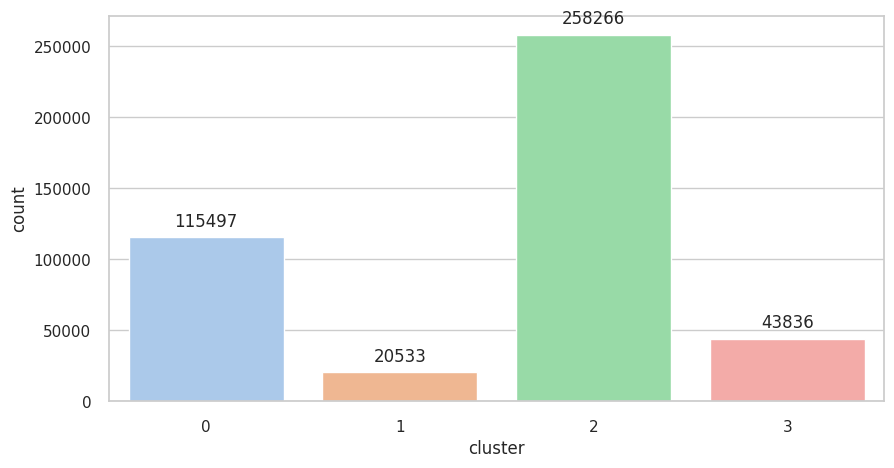

In [ ]:
# distribución de los clientes en cada clúster
plt.subplots(figsize=(10, 5))
ax = sns.countplot(x=df_kmeans["cluster"], palette='pastel')


add_value_labels(ax)
plt.show()

In [ ]:
cluster0 = df_kmeans[df_kmeans['cluster']==0]
cluster1 = df_kmeans[df_kmeans['cluster']==1]
cluster2 = df_kmeans[df_kmeans['cluster']==2]
cluster3 = df_kmeans[df_kmeans['cluster']==3]
#cluster4 = df_kmeans[df_kmeans['cluster']==4]

In [ ]:
clusteres = [cluster0, cluster1, cluster2, cluster3]

## **Entry_channel**

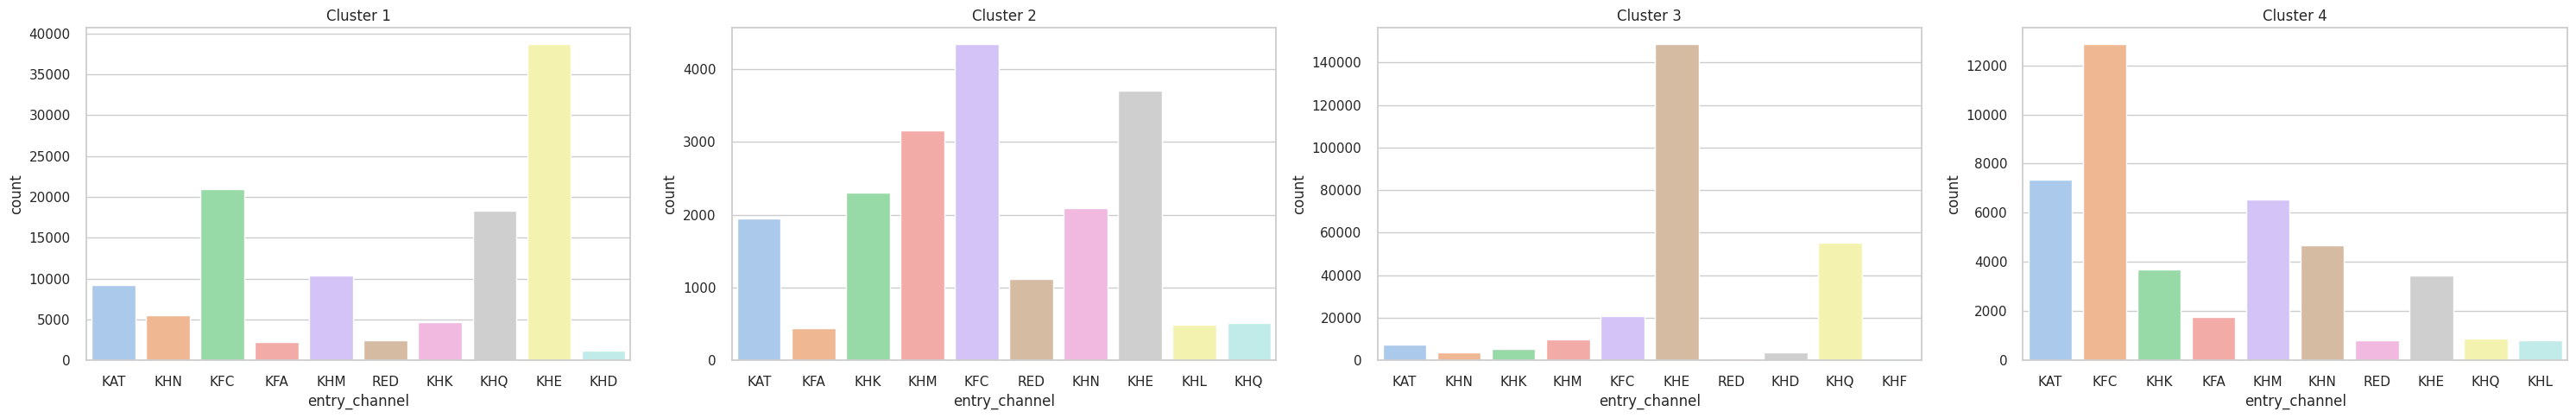

In [ ]:
fig, axes = plt.subplots(1, 4, sharey=False, figsize=(30, 5))

for i, cluster in enumerate(clusteres):
    top_10_values = cluster['entry_channel'].value_counts().head(10).index
    df_top_10 = cluster[cluster['entry_channel'].isin(top_10_values)]
    sns.countplot(data=df_top_10, x='entry_channel', palette='pastel', ax=axes[i])
    axes[i].set_title(f'Cluster {i+1}')

plt.tight_layout()
plt.show()

## **Active_customer**

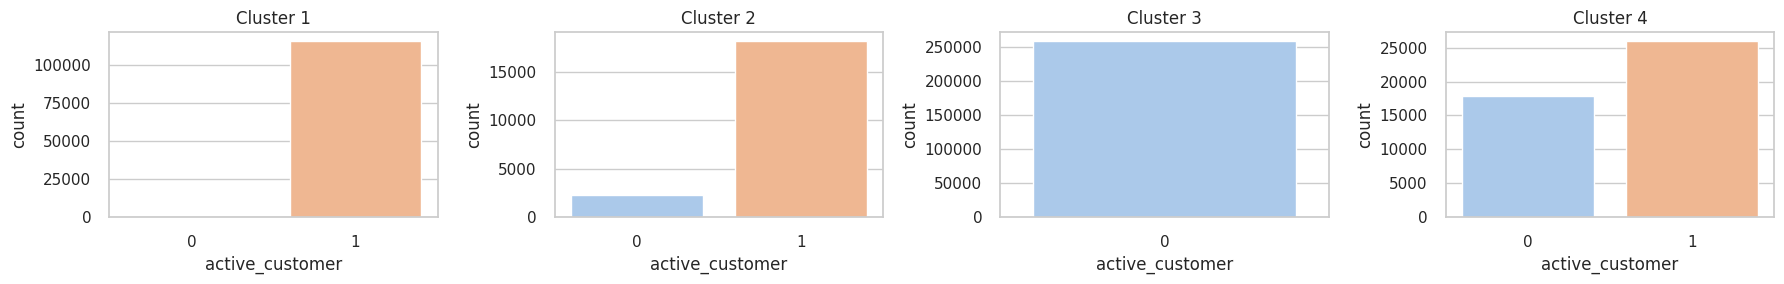

In [ ]:
fig, axes = plt.subplots(1, len(clusteres), sharey=False, figsize=(18, 3))

for i, cluster in enumerate(clusteres):
    sns.countplot(data=cluster, x='active_customer', palette='pastel', ax=axes[i])
    axes[i].set_title(f'Cluster {i+1}')

plt.tight_layout()
plt.show()

## **Segment**

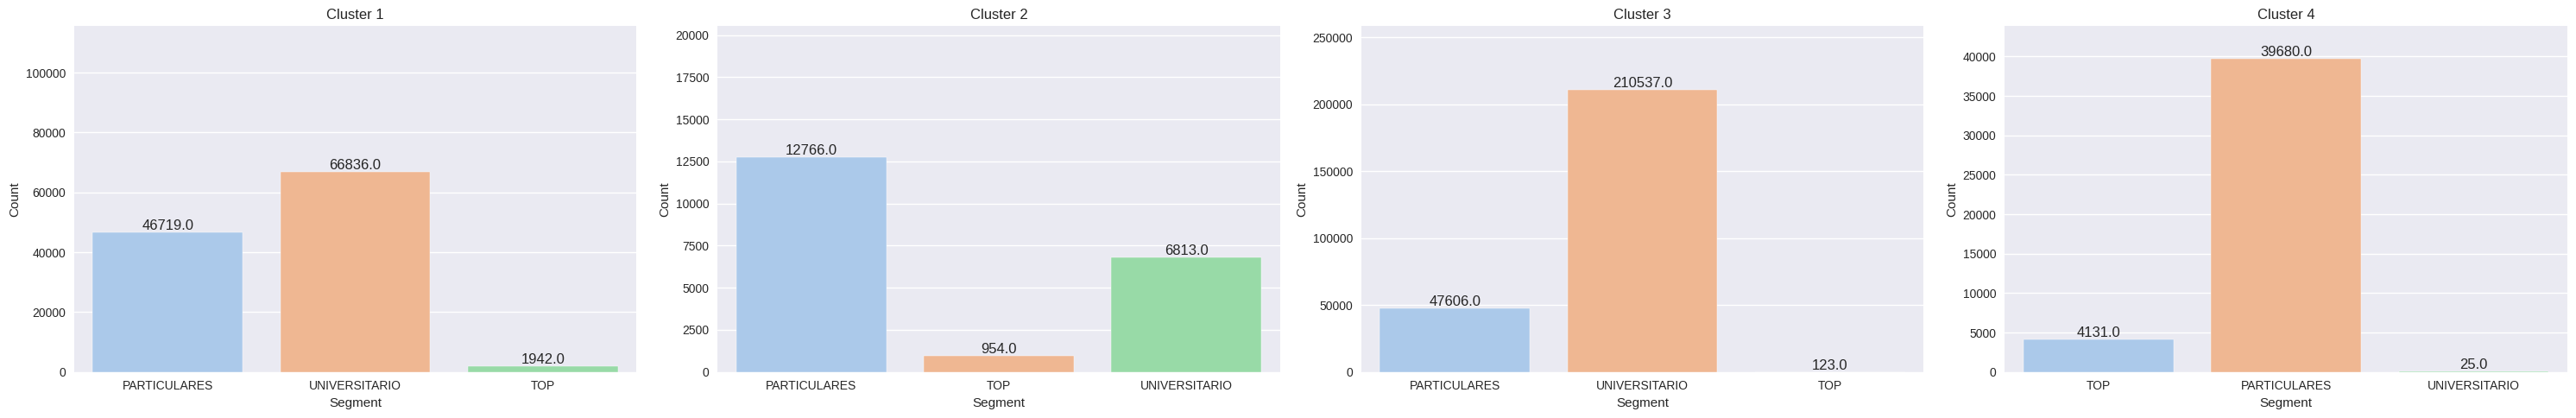

In [ ]:
# Detalles de segmento

fig, ax = plt.subplots(1, len(clusteres), sharey=False, figsize=(30, 5))
for i, cluster in enumerate(clusteres):
    sns.countplot(data=cluster, x='segment', ax=ax[i], palette='pastel')
    ax[i].set_title(f'Cluster {i+1}')
    ax[i].set_xlabel('Segment')
    ax[i].set_ylabel('Count')
    ax[i].set_ylim(0, len(cluster))

    # Agregar etiquetas de los valores
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **Productos**

In [ ]:
# creamos una lista con los productos

etiquetas_productos = ['indice_tenencia_payroll',
                       'indice_tenencia_payroll_account',
                       'indice_tenencia_pension_plan',
                       'indice_tenencia_em_acount',
                       'indice_tenencia_emc_account',
                       'indice_tenencia_short_term_deposit',
                       'indice_tenencia_long_term_deposit',
                       'indice_tenencia_loans',
                       'indice_tenencia_mortgage',
                       'indice_tenencia_funds',
                       'indice_tenencia_securities',
                       'indice_tenencia_credit_card',
                       'indice_tenencia_debit_card']

In [ ]:
# creamos una lista con los colores para cada cluster

colores = ['red', 'green', 'blue', 'yellow']

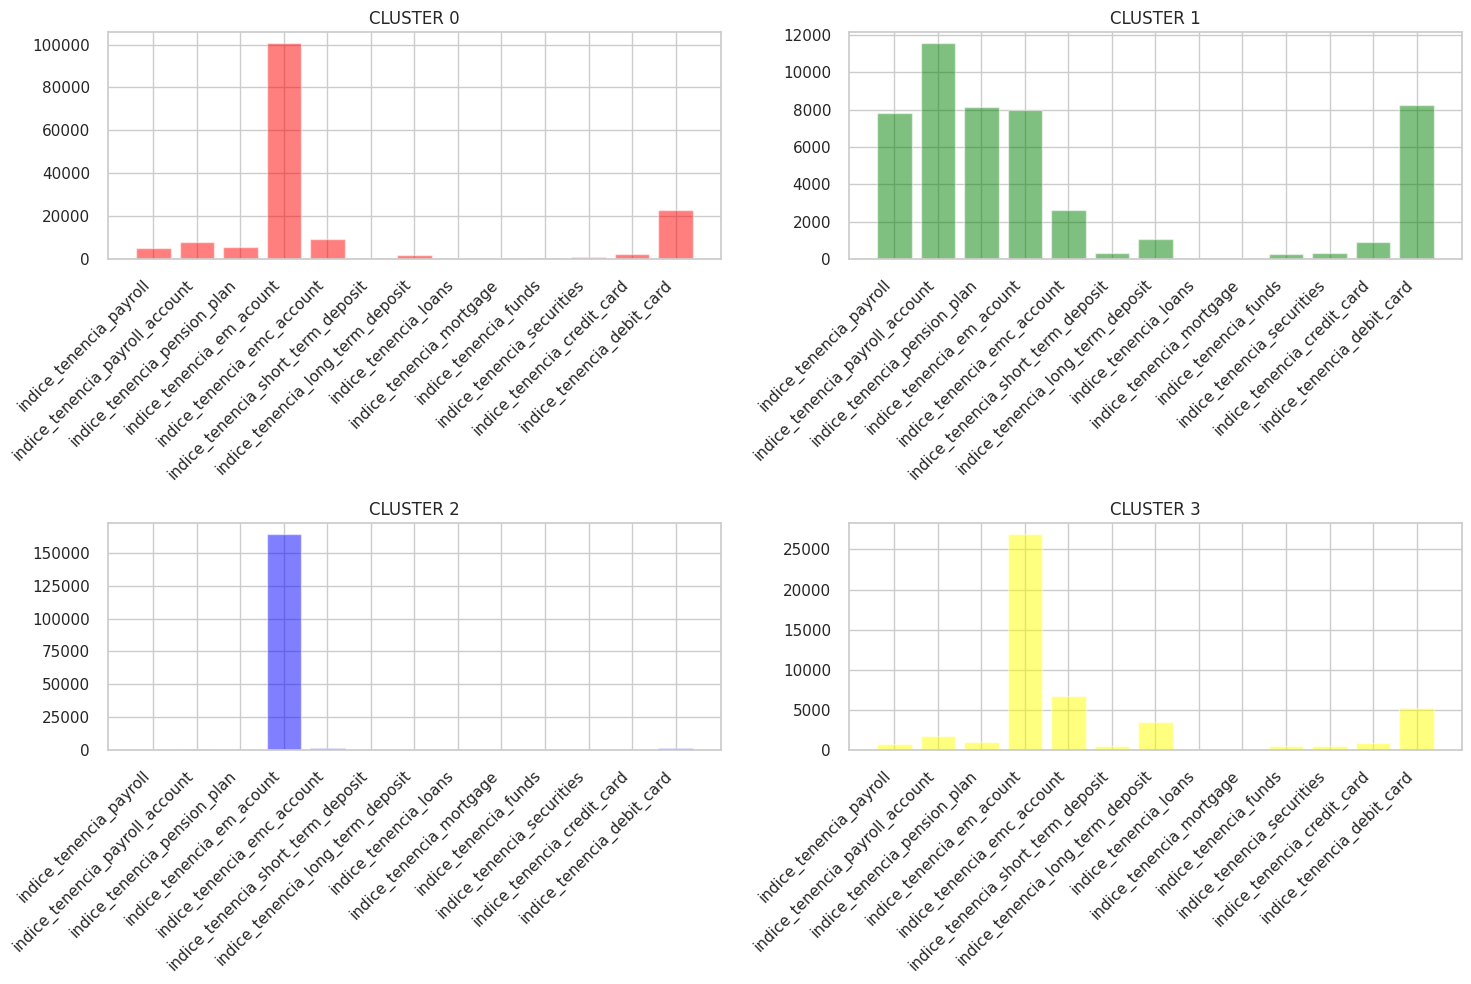

In [ ]:
import math

# Crear un gráfico de barras para cada cluster
n_clusters = len(clusteres)
n_productos = len(etiquetas_productos)

# Calcular el número de filas y columnas para organizar las gráficas
n_rows = math.ceil(n_clusters / 2)
n_cols = 2

# Crear la figura y los subgráficos
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Iterar sobre los clusters y los subgráficos
for i, ax in enumerate(axs.flatten()):
    if i < n_clusters:
        # Obtener los valores de cada producto en el cluster actual
        valores_productos = clusteres[i][etiquetas_productos].sum()
# Crear las barras con el color correspondiente
        ax.bar(range(n_productos), valores_productos, color=colores[i], alpha=0.5)
        ax.set_xticks(range(n_productos))
        ax.set_xticklabels(etiquetas_productos, rotation=45, ha='right')
        ax.set_title(f'CLUSTER {i}')
    else:
        # Si no hay más clusters, ocultar el subgráfico vacío
        ax.axis('off')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## **Media_pructos**

In [ ]:
cluster_means = df_kmeans.groupby('cluster')['media_prod_simult'].mean()

<ipython-input-116-d48f82aea373>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


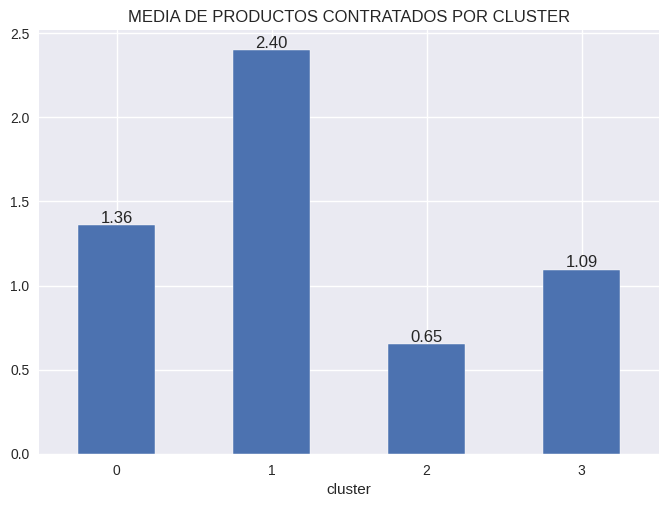

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn')

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Generar la gráfica de barras
cluster_means.plot(kind='bar', ax=ax)

# Etiquetar cada barra con su valor
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Configurar las etiquetas y títulos
ax.set_title('MEDIA DE PRODUCTOS CONTRATADOS POR CLUSTER')

# Ajustar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Mostrar la gráfica
plt.show()

## **Edad**

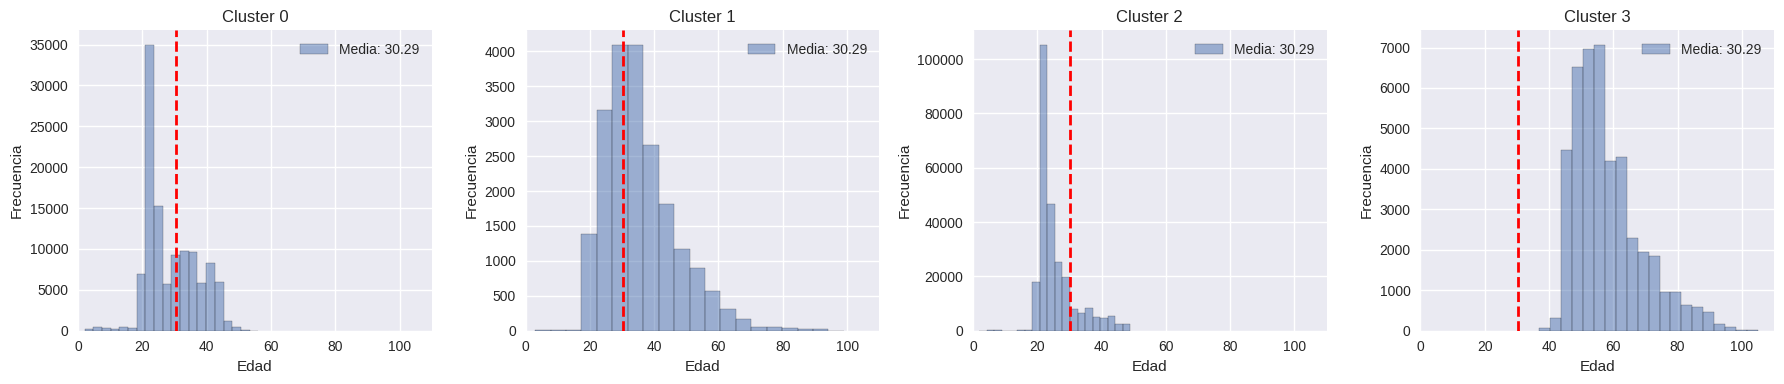

In [ ]:
# Calcular la media de edad del dataframe df_kmeans
mean_age_all = df_kmeans['age'].mean()

# Configurar el tamaño de la figura y el número de filas y columnas de los subplots
fig, axs = plt.subplots(nrows=1, ncols=len(clusteres), figsize=(18, 4))

# Generar las gráficas de edad para cada cluster
for i, cluster in enumerate(clusteres):
    cluster['age'].plot.hist(ax=axs[i], bins=20, alpha=0.5, edgecolor='black')
    axs[i].set_title(f'Cluster {i}')
    axs[i].set_xlabel('Edad')
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_xlim(0, 110)  # Configurar el rango del eje x

    # Agregar línea discontinua en rojo en la media de edad
    axs[i].axvline(mean_age_all, color='red', linestyle='dashed', linewidth=2)
    axs[i].legend([f'Media: {mean_age_all:.2f}'])

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## **Antiguedad**

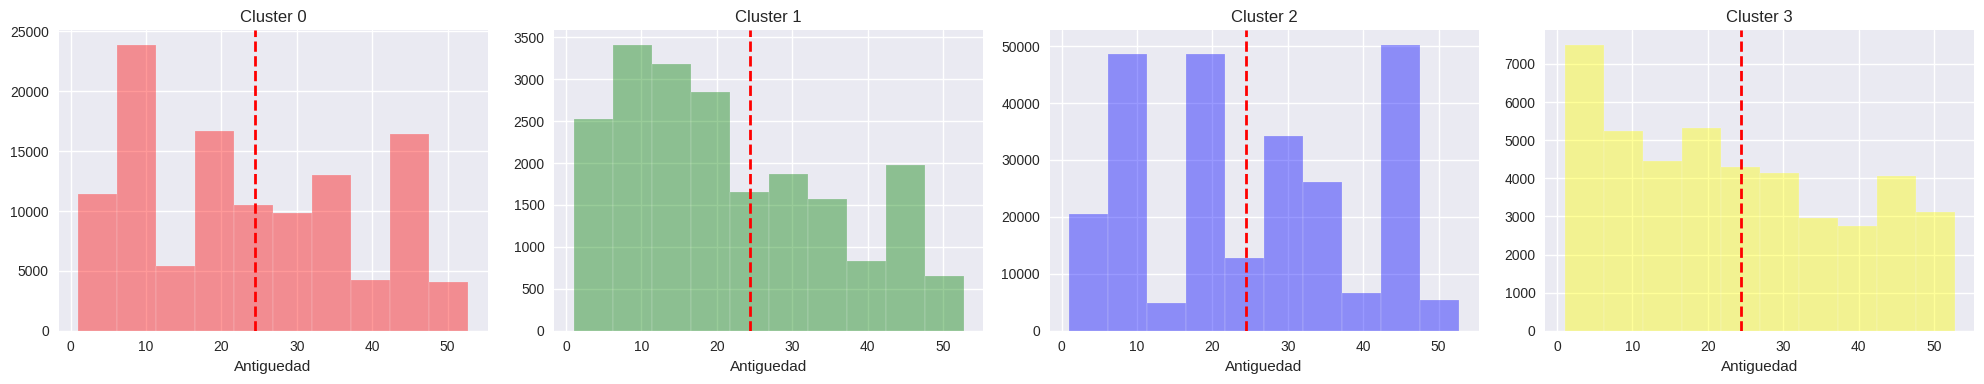

In [ ]:
# Define una lista de colores distintos para cada cluster
colores = ['red', 'green', 'blue', 'yellow']

fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Recorre cada dataframe y traza el histograma de la variable 'age' en su sub-gráfica correspondiente
for i, df in enumerate(clusteres):
    axes[i].hist(df['antiguedad'], bins=10, alpha=0.4, color=colores[i])
    axes[i].axvline(x=df_kmeans['antiguedad'].mean(), color='red', linestyle='--', linewidth=2)
    axes[i].set_title(f'Cluster {i}')
    axes[i].set_xlabel('Antiguedad')


# Ajusta el espaciado entre las sub-gráficas
plt.tight_layout()

# Muestra el gráfico
plt.show()

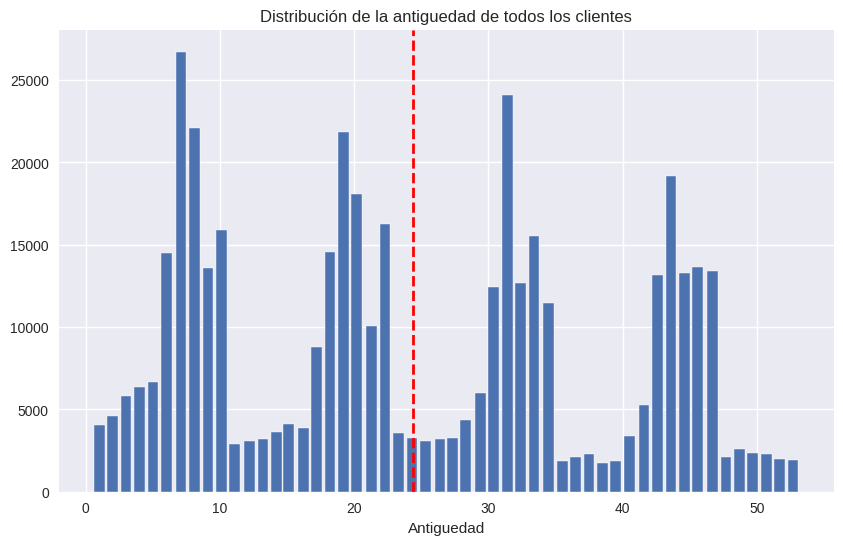

In [ ]:
antiguedad_counts = df_kmeans['antiguedad'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(antiguedad_counts.index, antiguedad_counts.values)

# Calcula la media de la columna 'age' en df_kmeans
antiguedad_mean = df_kmeans['antiguedad'].mean()

# Dibuja una línea vertical en el valor de la media
plt.axvline(x=antiguedad_mean, color='red', linestyle='--', linewidth=2, label='Media')

# Personaliza el gráfico
plt.title('Distribución de la antiguedad de todos los clientes')
plt.xlabel('Antiguedad')

# Muestra el gráfico
plt.show()

In [ ]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438132 entries, 5518940 to 5961847
Data columns (total 42 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   pk_cid                              438132 non-null  object        
 1   entry_date                          438132 non-null  datetime64[ns]
 2   entry_channel                       438102 non-null  object        
 3   active_customer                     438132 non-null  int8          
 4   segment                             438132 non-null  object        
 5   short_term_deposit                  438132 non-null  int8          
 6   loans                               438132 non-null  int8          
 7   mortgage                            438132 non-null  int8          
 8   funds                               438132 non-null  int8          
 9   securities                          438132 non-null  int8          
 10  l

## **Frecuencia_compra**

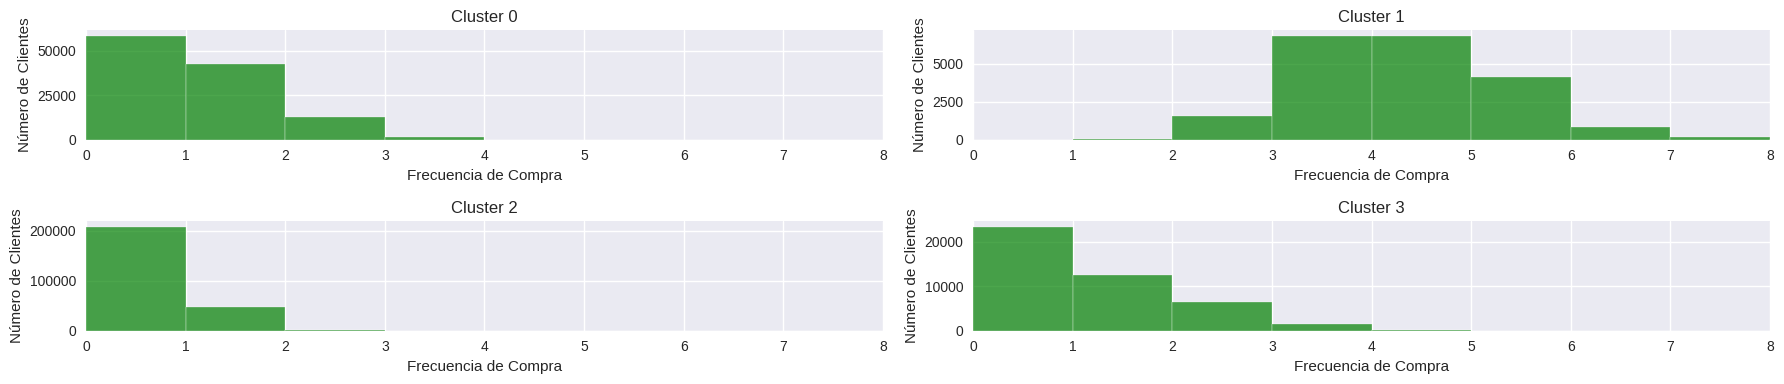

In [ ]:
# Calcular los bins comunes para todos los clusters
bins = np.histogram_bin_edges(np.concatenate([cluster['frecuencia_compra'] for cluster in clusteres]), bins=10)

# Configurar el tamaño de la figura y el número de filas y columnas de los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 4))

# Iterar sobre cada cluster
for i, cluster in enumerate(clusteres):
    # Obtener la frecuencia de compra en el cluster
    frecuencia_compra = cluster['frecuencia_compra']

    # Crear el gráfico de barras con los bins comunes
    ax = axs[i // 2, i % 2]
    frecuencia_compra.plot(kind='hist', ax=ax, bins=bins, color='green', alpha=0.7)

    # Configurar las etiquetas y el título del gráfico
    ax.set_xlabel('Frecuencia de Compra')
    ax.set_ylabel('Número de Clientes')
    ax.set_title(f'Cluster {i}')

    # Configurar el rango del eje x
    ax.set_xlim(0, 8)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## **Valor_ventas**

In [ ]:
df_kmeans['valor_ventas'].mean()

328.2308

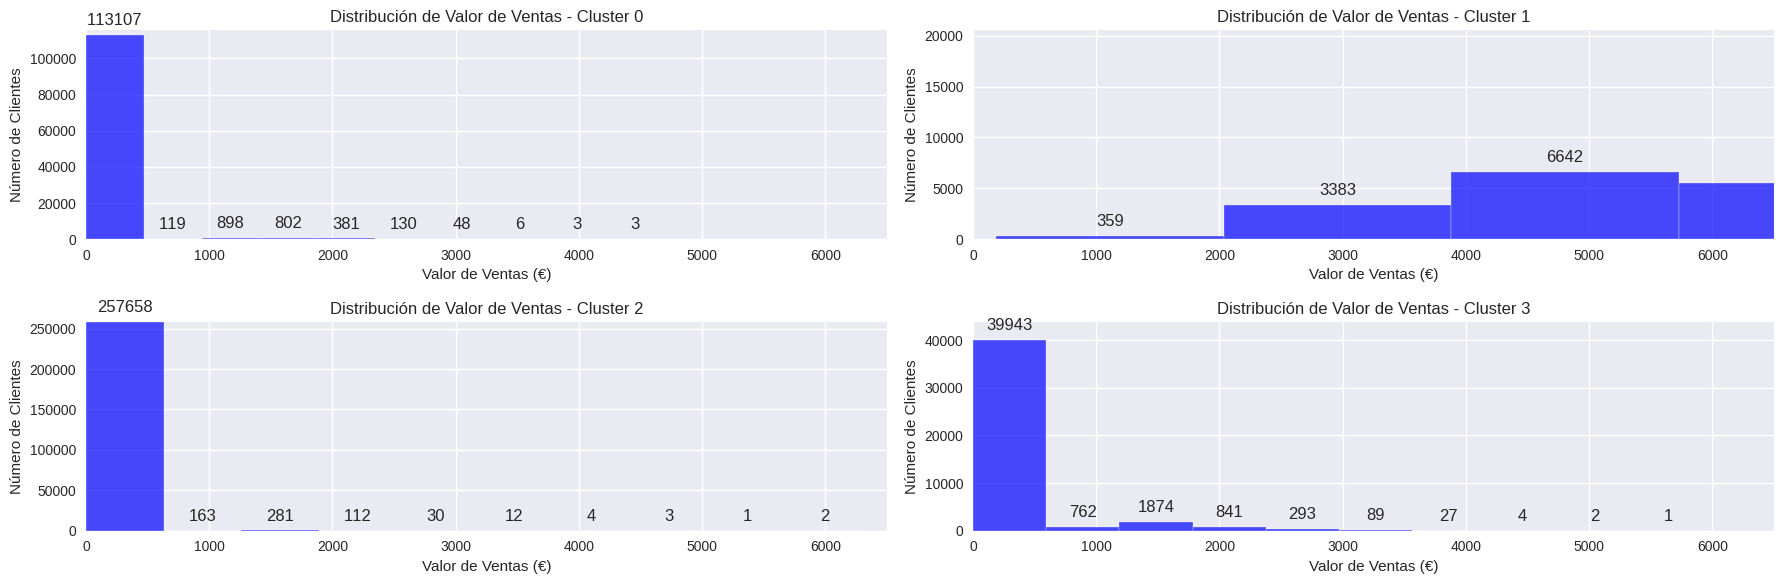

In [ ]:
# Configurar el tamaño de la figura y el número de filas y columnas de los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))

# Iterar sobre cada cluster
for i, cluster in enumerate(clusteres):
    # Filtrar los datos por el cluster actual
    cluster_df = cluster['valor_ventas']

    # Crear el histograma del valor_ventas para el cluster actual
    axs[i//2, i%2].hist(cluster_df, bins=10, color='blue', alpha=0.7)

    # Configurar los límites del eje x y y
    axs[i//2, i%2].set_xlim(0, 6500)
    axs[i//2, i%2].set_ylim(0, len(cluster_df))

    # Configurar las etiquetas de los ejes y el título del gráfico
    axs[i//2, i%2].set_xlabel('Valor de Ventas (€)')
    axs[i//2, i%2].set_ylabel('Número de Clientes')
    axs[i//2, i%2].set_title(f'Distribución de Valor de Ventas - Cluster {i}')

    # Mostrar el valor encima de cada barra
    for rect in axs[i//2, i%2].patches:
        height = rect.get_height()
        axs[i//2, i%2].annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## **Com.Autonoma**

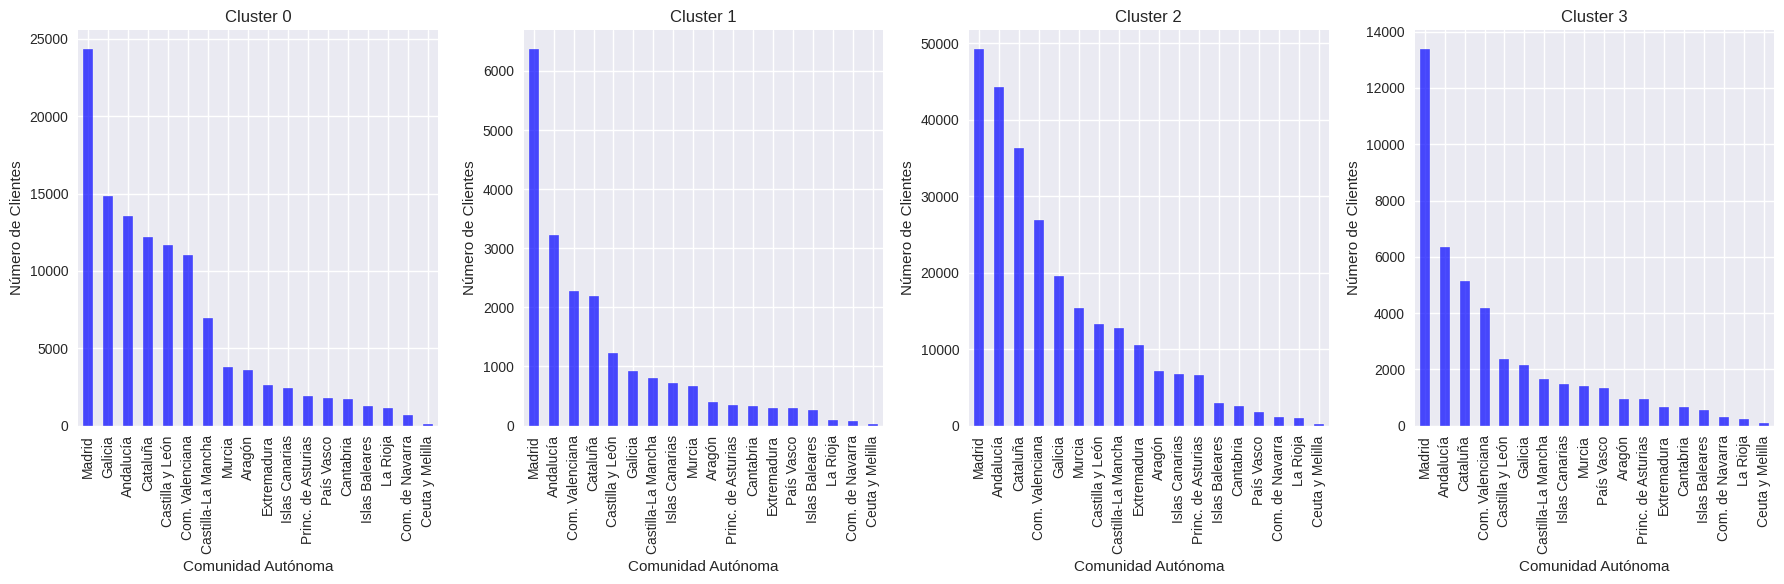

In [ ]:
# Configurar el tamaño de la figura y el número de filas y columnas de los subplots
fig, axs = plt.subplots(nrows=1, ncols=len(clusteres), figsize=(18, 6))

# Iterar sobre cada cluster
for i, cluster in enumerate(clusteres):
    # Obtener el conteo de clientes por comunidad autónoma
    conteo_comunidades = cluster['Com.Autonoma'].value_counts()

    # Crear el gráfico de barras
    ax = axs[i]
    conteo_comunidades.plot(kind='bar', ax=ax, color='blue', alpha=0.7)

    # Configurar las etiquetas y el título del gráfico
    ax.set_xlabel('Comunidad Autónoma')
    ax.set_ylabel('Número de Clientes')
    ax.set_title(f'Cluster {i}')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## **Salary**

In [ ]:
for i, cluster in enumerate(clusteres):
    salario_maximo = cluster['salary'].max().round(2)
    salario_minimo = cluster['salary'].min().round(2)
    salario_media = cluster['salary'].mean().round(2)

    print(f"Cluster {i}:")
    print(f"Salario máximo: {salario_maximo} €")
    print(f"Salario mínimo: {salario_minimo} €")
    print(f"Salario medio: {salario_media} €")
    print()

Cluster 0:
Salario máximo: 28894394.0 €
Salario mínimo: 3731.7900390625 €
Salario medio: 105571.671875 €

Cluster 1:
Salario máximo: 4347327.5 €
Salario mínimo: 5163.75 €
Salario medio: 108618.9765625 €

Cluster 2:
Salario máximo: 28894394.0 €
Salario mínimo: 1202.72998046875 €
Salario medio: 106840.3828125 €

Cluster 3:
Salario máximo: 15711716.0 €
Salario mínimo: 3796.860107421875 €
Salario medio: 114730.8984375 €

